In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
#!pip install voila
#!jupyter serverextension enable voila —sys-prefix

# Multidisease X-Ray Classifier.  v(0.2.0)

Demo X-Ray analyzer of multidiseases. 
Please note this system has not gone through clinical trials, or FDA review.  Do Not use to make treatment decisions.
Contact:- HydraML@protonmail.com

Training details:-

Confusion Matrix:-
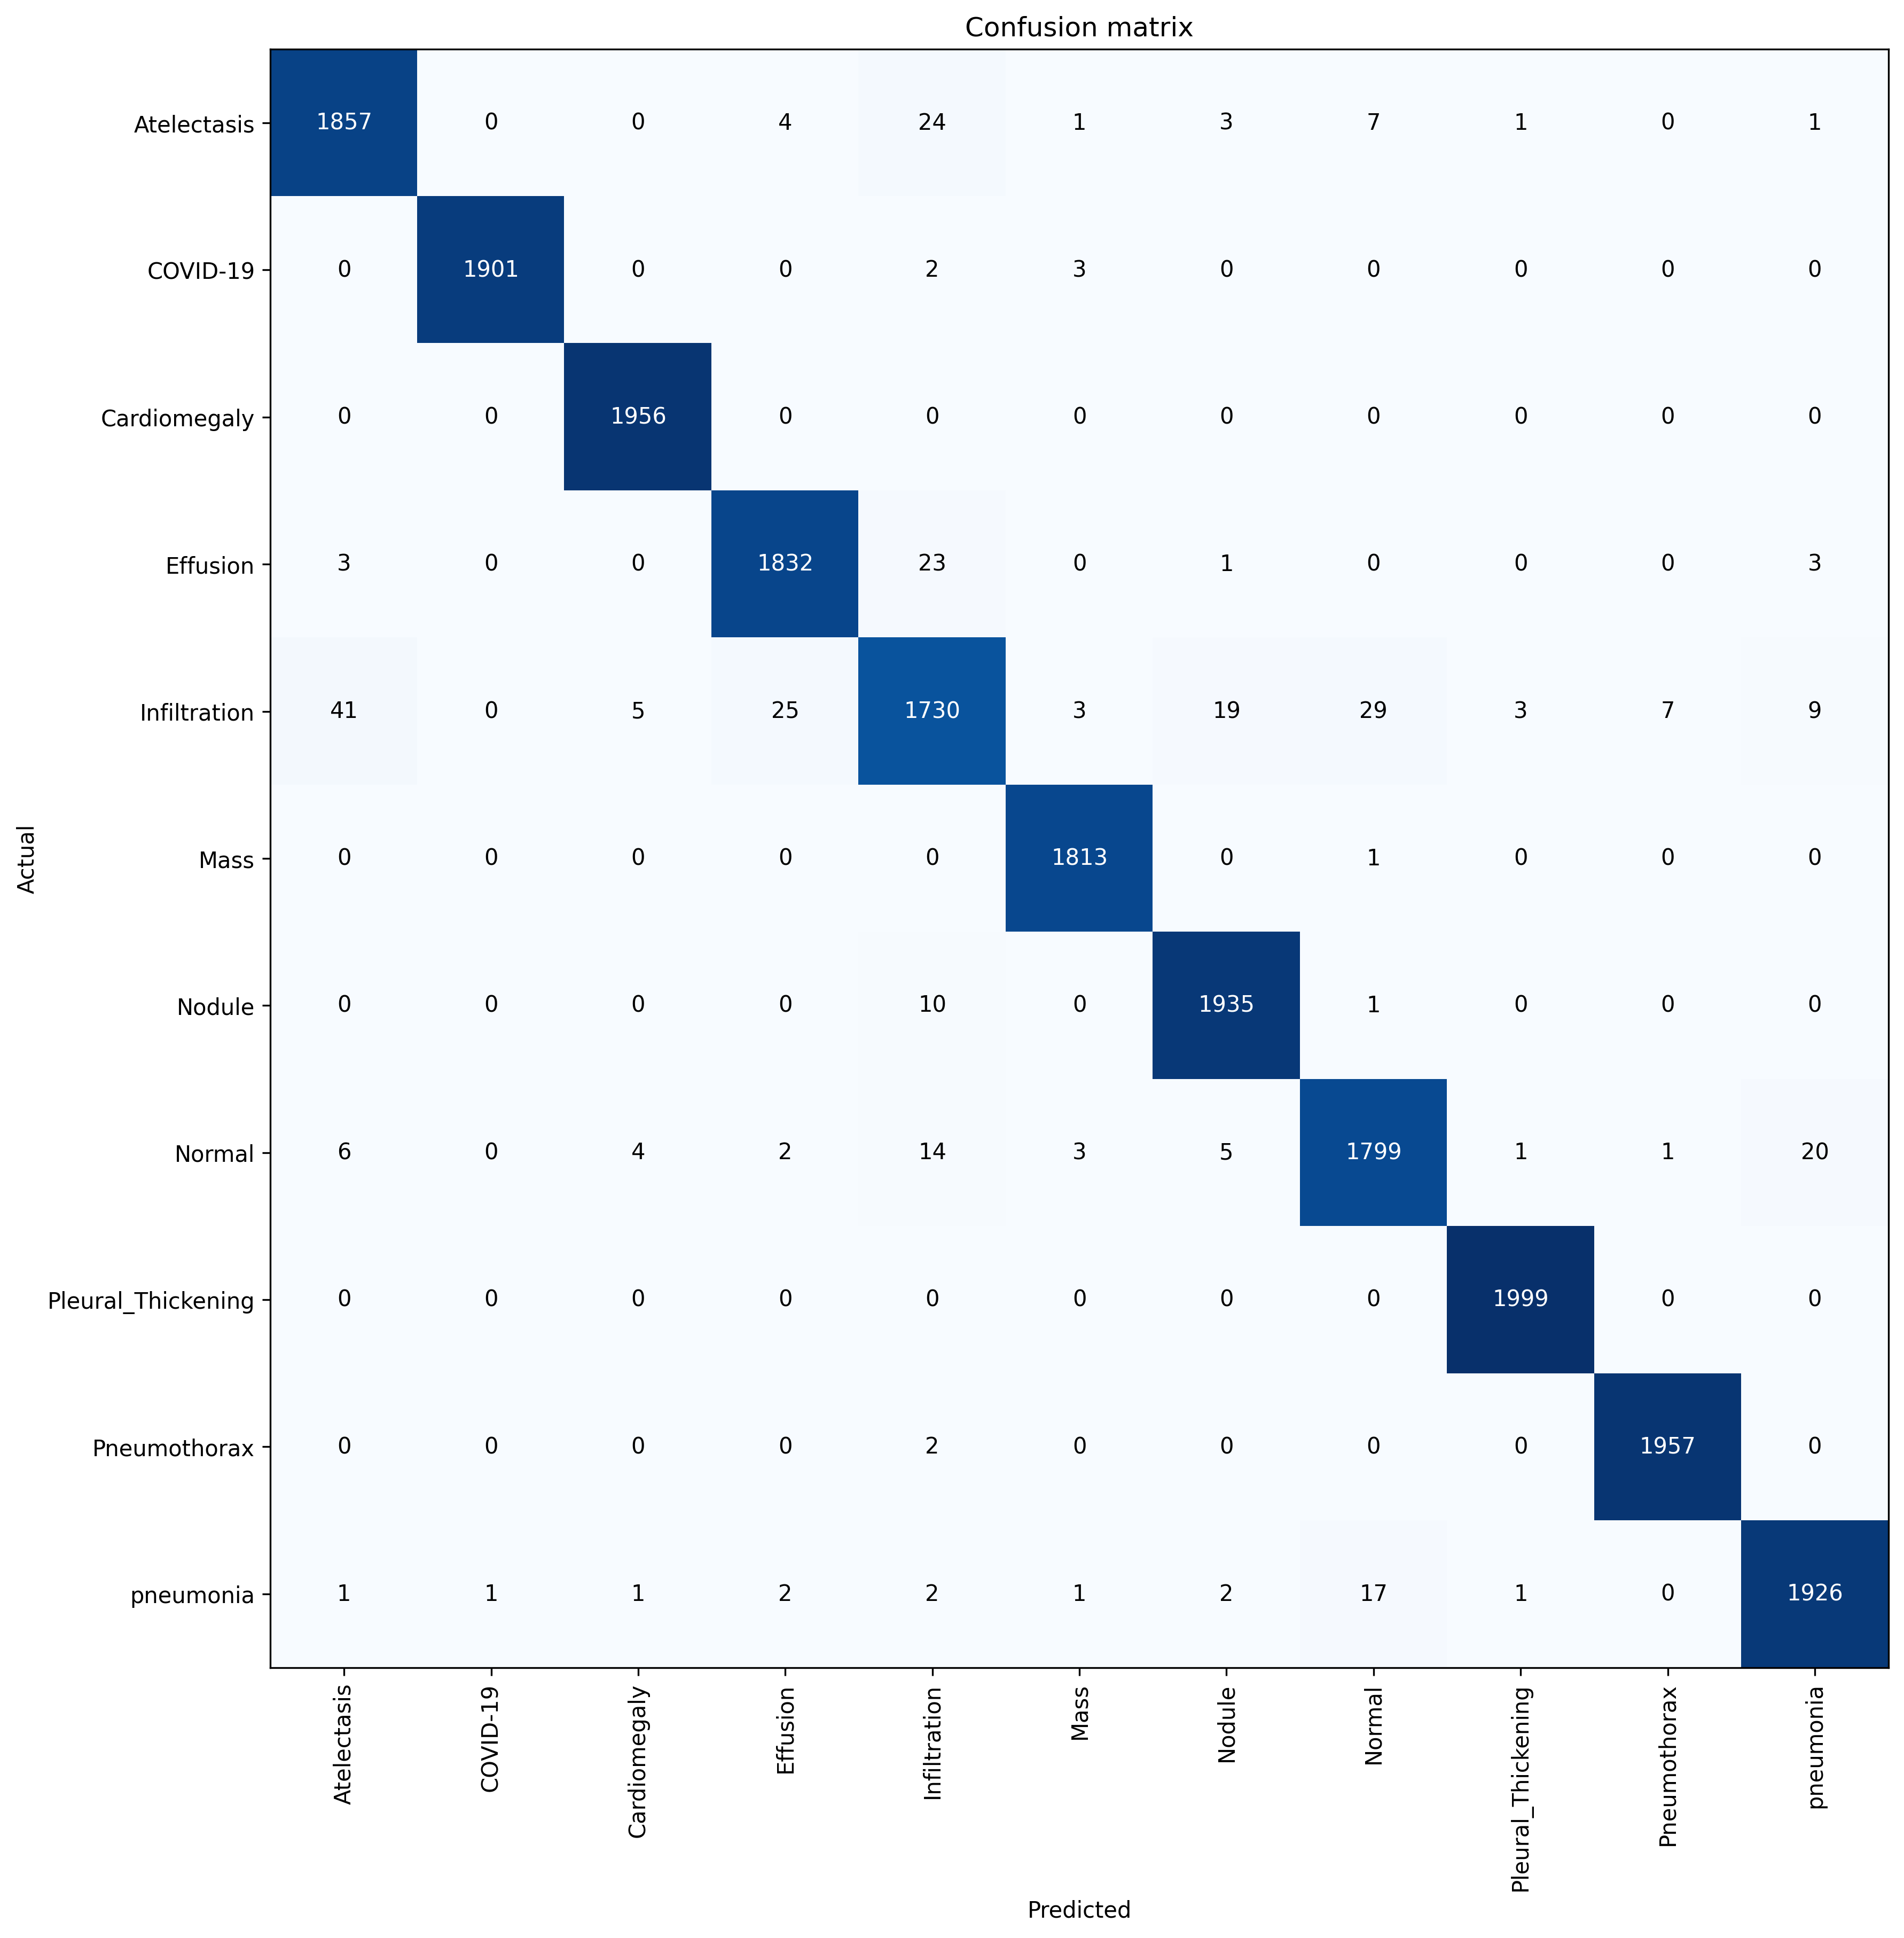

 

In [3]:
path = Path()
path
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()
lbl_predLine2 = widgets.Label()

In [4]:
def on_data_change(change):
    lbl_pred.value = ''
    lbl_predLine2.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(256,256))
    lbl_pred.value = 'Processing...'
    lbl_predLine2.value = ''
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred};'
    lbl_predLine2.value = f'Probability: {probs[pred_idx]:.04f}'

In [5]:
btn_upload.observe(on_data_change, names=['data'])

In [6]:
display(VBox([widgets.Label('Select your X-Ray image!'), btn_upload, out_pl, lbl_pred, lbl_predLine2]))